<a href="https://colab.research.google.com/github/noran97/NTI-AI-projects/blob/main/mlp_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Y =df.iloc[:,-1].values
X =df.iloc[:,:-1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler = StandardScaler()
x_train_N = scaler.fit_transform(x_train)
x_test_N = scaler.transform(x_test)

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
logreg.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7719869706840391

In [ ]:
logreg.score(x_test,y_test)

0.7467532467532467

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
#print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [ ]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
logreg = LogisticRegression(C=1.0, max_iter=2000, tol=1e-3)
logreg.fit(X_train_S, y_train_S)
logreg.score(X_train_S,y_train_S)

0.75125

In [ ]:
logreg.score(X_test_S,y_test_S)

0.75

In [ ]:
y_pred = logreg.predict(X_test_S)
target_names = ['without diabetes', 'with diabetes']
#print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dense(16,activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train=model.fit(x_train,y_train,epochs=200,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5836 - loss: 13.6097 - val_accuracy: 0.6829 - val_loss: 0.7487
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.7803 - val_accuracy: 0.6260 - val_loss: 0.7754
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.7336 - val_accuracy: 0.6098 - val_loss: 0.9092
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6651 - loss: 0.7117 - val_accuracy: 0.6179 - val_loss: 0.7344
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6483 - loss: 0.6822 - val_accuracy: 0.6098 - val_loss: 0.7101
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - loss: 0.6934 - val_accuracy: 0.6179 - val_loss: 0.6965
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 0.6558 - val_accuracy: 0.6179 - val_loss: 0.6891
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6334 - loss: 0.6716 - val_accuracy: 0.6179 -

In [ ]:
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
train=model.fit(x_train,y_train,epochs=200,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7753 - loss: 0.4773 - val_accuracy: 0.7154 - val_loss: 0.5582
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7795 - loss: 0.5006 - val_accuracy: 0.7480 - val_loss: 0.5490
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4665 - val_accuracy: 0.7398 - val_loss: 0.5419
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7811 - loss: 0.4571 - val_accuracy: 0.7480 - val_loss: 0.5393
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.4996 - val_accuracy: 0.7317 - val_loss: 0.5520
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7681 - loss: 0.4630 - val_accuracy: 0.7236 - val_loss: 0.5569
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7803 - loss: 0.4607 - val_accuracy: 0.7398 - val_loss: 0.5498
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7767 - loss: 0.4752 - val_accuracy: 0.7317 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.6688


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
model1=Sequential()
model1.add(Dense(32, activation='relu', input_shape=(8,)))
model1.add(Dense(16, activation='relu',))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train=model.fit(x_train_N,y_train,epochs=100,batch_size=16,validation_split=0.2,verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6471 - loss: 1.0157 - val_accuracy: 0.6098 - val_loss: 0.9461
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.7430 - val_accuracy: 0.6098 - val_loss: 0.8378
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 0.7377 - val_accuracy: 0.6016 - val_loss: 0.7729
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 0.7125 - val_accuracy: 0.5935 - val_loss: 0.7310
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6266 - loss: 0.7081 - val_accuracy: 0.6016 - val_loss: 0.7028
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.6282 - val_accuracy: 0.6098 - val_loss: 0.6816
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6556 - loss: 0.6595 - val_accuracy: 0.6016 - val_loss: 0.6669
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6249 - loss: 0.6678 - val_accuracy: 0.6098 - v

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train=model1.fit(x_train_N,y_train,epochs=200,batch_size=32,validation_split=0.3,verbose=1)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8557 - loss: 0.3462 - val_accuracy: 0.7676 - val_loss: 0.4445
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8314 - loss: 0.4074 - val_accuracy: 0.7730 - val_loss: 0.4449
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7899 - loss: 0.4005 - val_accuracy: 0.7730 - val_loss: 0.4455
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8228 - loss: 0.3721 - val_accuracy: 0.7730 - val_loss: 0.4463
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8375 - loss: 0.4003 - val_accuracy: 0.7676 - val_loss: 0.4470
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8070 - loss: 0.4270 - val_accuracy: 0.7622 - val_loss: 0.4469
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 0.3840 - val_accuracy: 0.7622 - val_loss: 0.4473
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8134 - loss: 0.4243 - val_accuracy: 0.7622 - 

In [ ]:
train=model.fit(X_train_S,y_train_S,epochs=500,batch_size=16,validation_split=0.2,verbose=1)

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5731 - loss: 5.1106 - val_accuracy: 0.5813 - val_loss: 0.6351
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6464 - loss: 0.6390 - val_accuracy: 0.6625 - val_loss: 0.6171
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6449 - val_accuracy: 0.7000 - val_loss: 0.5976
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.6043 - val_accuracy: 0.6625 - val_loss: 0.6048
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.6043 - val_accuracy: 0.6562 - val_loss: 0.6180
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.6037 - val_accuracy: 0.6438 - val_loss: 0.5910
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.6190 - val_accuracy: 0.6812 - val_loss: 0.5784
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.5910 - val_accuracy: 0.7125 - v

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.809


In [ ]:
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.1)))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train=model3.fit(x_train_N,y_train,epochs=300,batch_size=32,validation_split=0.3,verbose=1)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6021 - loss: 2.7972 - val_accuracy: 0.6811 - val_loss: 2.5848
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6116 - loss: 2.5700 - val_accuracy: 0.7081 - val_loss: 2.3686
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6590 - loss: 2.3280 - val_accuracy: 0.7081 - val_loss: 2.1737
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6194 - loss: 2.1572 - val_accuracy: 0.7189 - val_loss: 1.9989
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6893 - loss: 1.9699 - val_accuracy: 0.7297 - val_loss: 1.8419
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - loss: 1.8190 - val_accuracy: 0.7351 - val_loss: 1.7014
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7028 - loss: 1.6651 - val_accuracy: 0.7351 - val_loss: 1.5760
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7348 - loss: 1.5394 - val_accuracy: 0.7459 - 

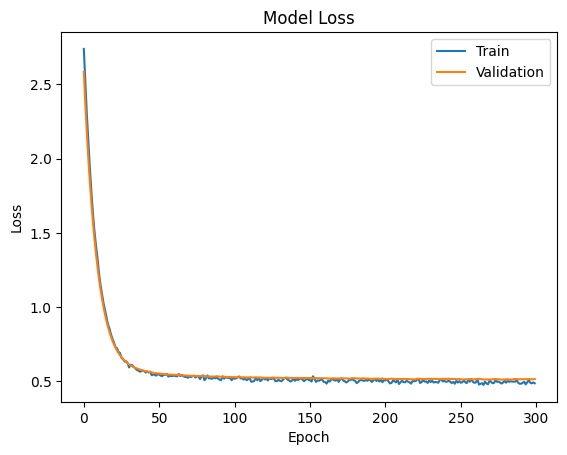

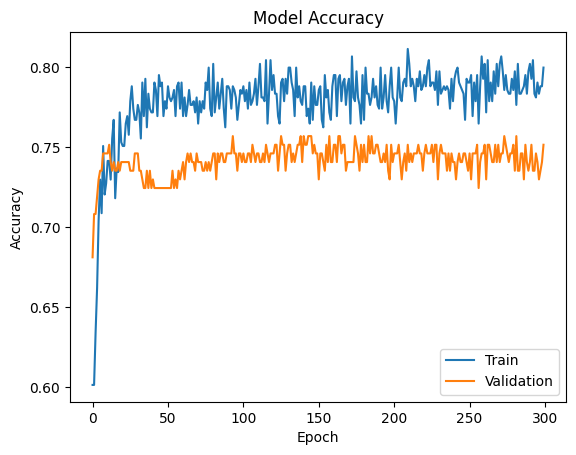

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()